In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(5319, 2)

In [3]:
df.head()

,Time,domain
0,2022-01-19 21:24:42-04:00,webauth.umbc.edu
1,2022-01-19 21:24:42-04:00,webauth.umbc.edu
2,2022-01-19 21:24:51-04:00,myretrievercare.umbc.edu
3,2022-01-19 21:24:51-04:00,webauth.umbc.edu
4,2022-01-19 21:24:51-04:00,webauth.umbc.edu


In [4]:
df.tail()

,Time,domain
5314,2022-04-19 21:13:23-04:00,meet.google.com
5315,2022-04-19 21:16:56-04:00,meet.google.com
5316,2022-04-19 21:17:09-04:00,meet.google.com
5317,2022-04-19 21:17:56-04:00,meet.google.com
5318,2022-04-19 21:18:01-04:00,meet.google.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns, pytz.FixedOffset(-240)]
domain                                    object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-19 21:24:42-04:00,webauth.umbc.edu
1,2022-01-19 21:24:42-04:00,webauth.umbc.edu
2,2022-01-19 21:24:51-04:00,myretrievercare.umbc.edu
3,2022-01-19 21:24:51-04:00,webauth.umbc.edu
4,2022-01-19 21:24:51-04:00,webauth.umbc.edu


In [106]:
# df['domain'].unique()

In [14]:
df['domain'].value_counts()[:50]

www.google.com                                                   960
webauth.umbc.edu                                                 785
1stkissmanga.io                                                  623
blackboard.umbc.edu                                              352
mangatx.com                                                      247
github.com                                                       207
my.umbc.edu                                                      156
www.w3schools.com                                                150
www.amazon.com                                                   120
csprd-web.ps.umbc.edu                                             84
localhost:8888                                                    82
www.coursehero.com                                                74
www.youtube.com                                                   63
umbc-my.sharepoint.com                                            59
readmanganato.com                 

<AxesSubplot:>

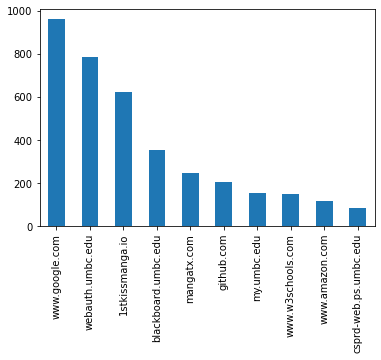

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     240
1     133
2     135
3      34
4      37
7      37
8      82
9     130
10    208
11    208
12    464
13    295
14    247
15    438
16    596
17    372
18    332
19    222
20    213
21    290
22    248
23    358
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

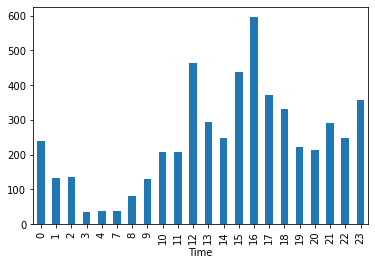

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-19 21:24:42-04:00,webauth.umbc.edu,Wednesday,2
1,2022-01-19 21:24:42-04:00,webauth.umbc.edu,Wednesday,2
2,2022-01-19 21:24:51-04:00,myretrievercare.umbc.edu,Wednesday,2
3,2022-01-19 21:24:51-04:00,webauth.umbc.edu,Wednesday,2
4,2022-01-19 21:24:51-04:00,webauth.umbc.edu,Wednesday,2


In [19]:
df['Day'].value_counts()

Sunday       910
Thursday     835
Tuesday      810
Monday       799
Wednesday    776
Friday       653
Saturday     536
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    799
1    810
2    776
3    835
4    653
5    536
6    910
Name: DayIndex, dtype: int64

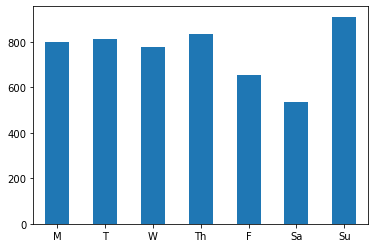

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-19 21:24:42-04:00,webauth.umbc.edu,Wednesday,2,False
1,2022-01-19 21:24:42-04:00,webauth.umbc.edu,Wednesday,2,False
2,2022-01-19 21:24:51-04:00,myretrievercare.umbc.edu,Wednesday,2,False
3,2022-01-19 21:24:51-04:00,webauth.umbc.edu,Wednesday,2,False
4,2022-01-19 21:24:51-04:00,webauth.umbc.edu,Wednesday,2,False


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
243,2022-01-29 12:05:44-04:00,www.google.com,Saturday,5,True
244,2022-01-29 12:05:50-04:00,www.amazon.com,Saturday,5,True
245,2022-01-29 12:06:16-04:00,www.google.com,Saturday,5,True
246,2022-01-29 12:06:20-04:00,www.amazon.com,Saturday,5,True
247,2022-01-29 12:06:43-04:00,www.amazon.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com         716
webauth.umbc.edu       608
1stkissmanga.io        388
blackboard.umbc.edu    243
github.com             190
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.google.com         244
1stkissmanga.io        235
webauth.umbc.edu       177
blackboard.umbc.edu    109
mangatx.com             76
Name: domain, dtype: int64

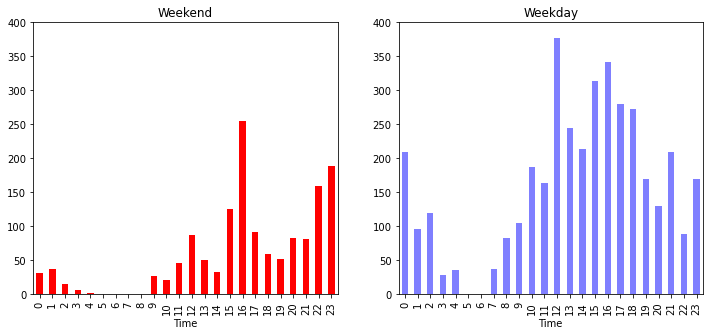

In [46]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 400])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

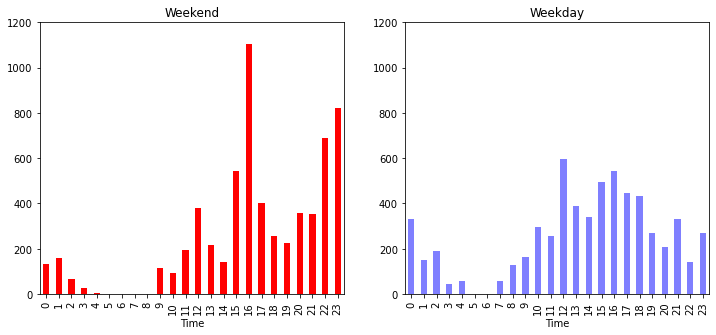

In [100]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1200]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [59]:
df['domain'].value_counts()[:30]

www.google.com                                                   960
webauth.umbc.edu                                                 785
1stkissmanga.io                                                  623
blackboard.umbc.edu                                              352
mangatx.com                                                      247
github.com                                                       207
my.umbc.edu                                                      156
www.w3schools.com                                                150
www.amazon.com                                                   120
csprd-web.ps.umbc.edu                                             84
localhost:8888                                                    82
www.coursehero.com                                                74
www.youtube.com                                                   63
umbc-my.sharepoint.com                                            59
readmanganato.com                 

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

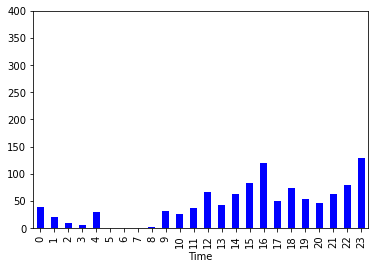

In [47]:
_= show_domain_stats('google', 'blue')

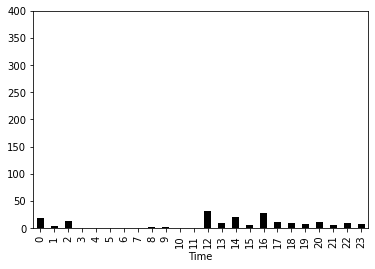

In [79]:
_= show_domain_stats('youtube|netflix|amazon', 'black')

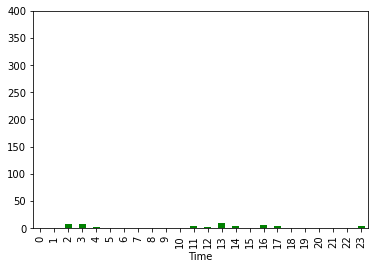

In [80]:
_= show_domain_stats('anime', 'green')

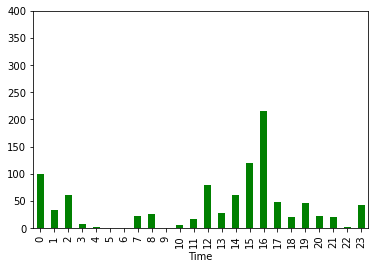

In [82]:
_= show_domain_stats('1stkissmanga|mangatx|manga|anime', 'green')

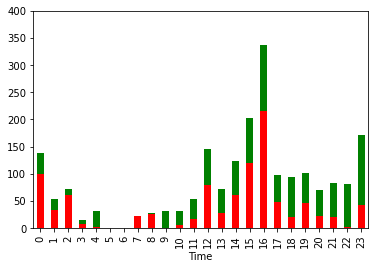

In [98]:
_= show_domain_stats('1stkissmanga|mangatx|manga|anime|google', 'green')
_= show_domain_stats('1stkissmanga|mangatx|manga|anime', 'red')

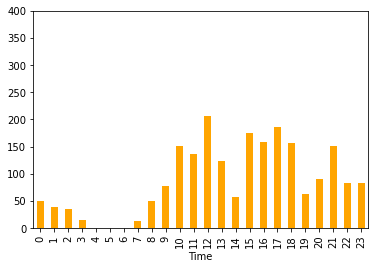

In [83]:
_= show_domain_stats('umbc|webauth|myretrievercare|coursehero|github|w3school', 'orange')

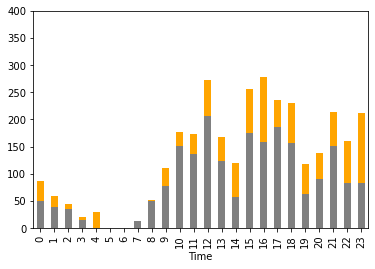

In [97]:
_= show_domain_stats('umbc|webauth|myretrievercare|coursehero|github|w3school|google', 'orange')
_= show_domain_stats('umbc|webauth|myretrievercare|coursehero|github|w3school', 'grey')

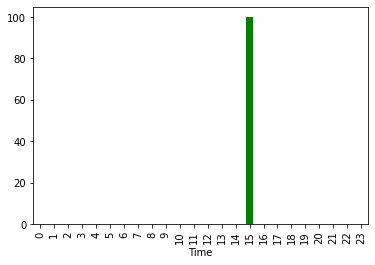

In [103]:
_= show_domain_stats('bank', 'green')

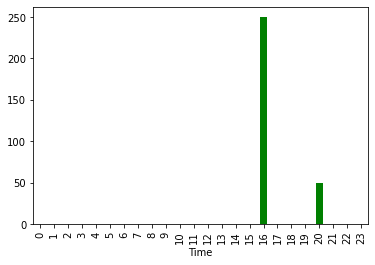

In [105]:
_= show_domain_stats('southwest', 'green')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

##### 1. Is this a work computer/personal computer?
=> After getting an overview of the history and analyzing it, It seems that this is a personal computer as there are some anime and manga sites and also this seems to a laptop of the student of University of Maryland Baltimore County
##### 2. Is he employed?
=> No, as mentioned earlier, this user is a student at UMBC, probably an undergraduate or graduate or a PHD student. However, as the content of the history seem a bit immature, I do not think that the user is a PHD student.
##### 3. What is his interests?
=> After looking at the users history, it can be infered that he mostly spends time on studying() and reading manga. There are also instances where he uses amazon, youtube, netflix and some anime sites of the user may be watching web series and anime in free time.
##### 4. Anything interesting?
=> Analyzing the data, It seems that the user spends almost same time on the computer from Monday to Thrusday, and the usage is maximum on Sunday.

=> Also, in afternoon, the user uses the computer more on the weekends as compared to weekdays.

=> The usage starts from 8-9 am and gradually increases in the afternoon(12 to 16) and then gradually decreases till late night(upto 4 am), so the user is a late sleeper and sleeps less, only 4-5 hours.

=> The user seems to have bank account in Bank of America and also may have went on a trip(as user was visiting Southwest airlines website)